<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/.%20Machine%20Learning/Semana%201%20-%20Intro%20to%20Machine%20Learning%20and%20PreProcessing/Semana_1_Actividad_de_pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La pregunta de aprendizaje automatico es:

Que tan bien se pueden predecir las calorias basandose en el fabricante, tipo de cereal, gramos de grasa, gramos de azucares y el peso en onzas por una porcion del cereal?


Hasta ahora, solo completaran los pasos de preprocesamiento para esta tarea.

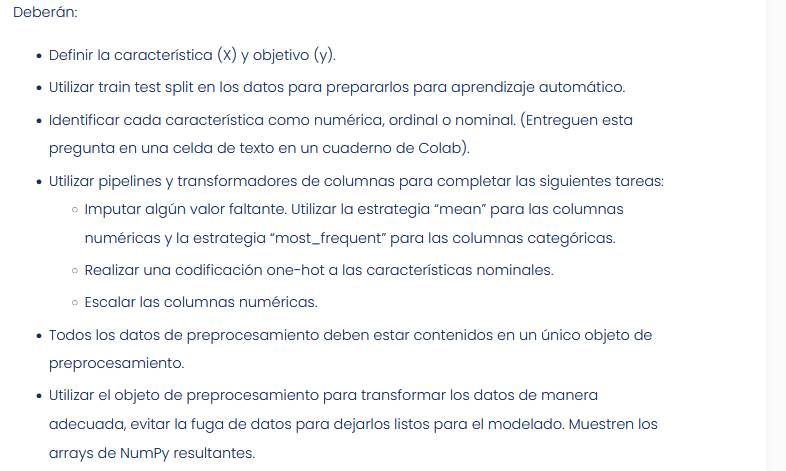

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")


Mounted at /content/drive


In [ ]:
filename = "/content/drive/MyDrive/Data CodingDojo/Cereal with missing values.xlsx"
df = pd.read_excel(filename)
df.head()

,name,Manufacturer,type,calories per serving,grams of protein,grams of fat,milligrams of sodium,grams of dietary fiber,grams of complex carbohydrates,grams of sugars,milligrams of potassium,vitamins and minerals (% of FDA recommendation),Display shelf,Weight in ounces per one serving,Number of cups in one serving,Rating of cereal
0,Apple Cinnamon Cheerios,General Mills,Cold,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0,1.0,1.00,0.75,29.509541
1,Basic 4,General Mills,Cold,130.0,3.0,2.0,NaN,2.0,18.0,NaN,100.0,25.0,3.0,1.33,0.75,37.038562
2,Cheerios,General Mills,Cold,NaN,6.0,2.0,290.0,2.0,17.0,1.0,105.0,25.0,1.0,1.00,1.25,50.764999
3,Cinnamon Toast Crunch,General Mills,Cold,120.0,1.0,3.0,210.0,0.0,13.0,9.0,45.0,25.0,2.0,1.00,0.75,19.823573
4,Clusters,General Mills,Cold,110.0,3.0,2.0,140.0,2.0,13.0,7.0,105.0,25.0,3.0,1.00,0.50,40.400208


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   name                                             77 non-null     object 
 1   Manufacturer                                     77 non-null     object 
 2   type                                             68 non-null     object 
 3   calories per serving                             70 non-null     float64
 4   grams of protein                                 77 non-null     float64
 5   grams of fat                                     69 non-null     float64
 6   milligrams of sodium                             76 non-null     float64
 7   grams of dietary fiber                           77 non-null     float64
 8   grams of complex carbohydrates                   77 non-null     float64
 9   grams of sugars                   

In [ ]:
df.isna().sum()

name                                               0
Manufacturer                                       0
type                                               9
calories per serving                               7
grams of protein                                   0
grams of fat                                       8
milligrams of sodium                               1
grams of dietary fiber                             0
grams of complex carbohydrates                     0
grams of sugars                                    9
milligrams of potassium                            0
vitamins and minerals (% of FDA recommendation)    1
Display shelf                                      0
Weight in ounces per one serving                   0
Number of cups in one serving                      0
Rating of cereal                                   0
dtype: int64

# Definir caracteristicas X y objetivo y

In [ ]:
X = df.drop(columns = "calories per serving")
y = df["calories per serving"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42
                                                    )

# Identificar cada caracteristica numerica, ordinal o nominal
# Instanciar selectores de columnas

In [ ]:
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)



numeric columns are ['grams of protein', 'grams of fat', 'milligrams of sodium', 'grams of dietary fiber', 'grams of complex carbohydrates', 'grams of sugars', 'milligrams of potassium', 'vitamins and minerals (% of FDA recommendation)', 'Display shelf', 'Weight in ounces per one serving', 'Number of cups in one serving', 'Rating of cereal'] 

nominal columns are ['name', 'Manufacturer', 'type']

# Imputar valores faltantes, usar mean para columnas numericas y most frequent para categoricas

instanciar transformadores

In [ ]:
freq_imputer = SimpleImputer(strategy="most_frequent") # categoricas
mean_imputer = SimpleImputer(strategy="mean") # numericas

#scaler
scaler = StandardScaler()

#OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse = False)

# Instanciar pipelines

In [ ]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
categorical_pipe = make_pipeline(freq_imputer,ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Instanciar ColumnTransformer

In [ ]:
# tuples para column transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# columntransformer
preprocessor = make_column_transformer(number_tuple,category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ecabceeb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ecabce760>)])

# Transformador de datos

ajustar el ColumnTransformer a los datos de entrenamiento

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ecabceeb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7ecabce760>)])

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Inspeccion de resultados

In [ ]:
np.isnan(X_train_processed).sum().sum()

0

In [ ]:
np.isnan(X_test_processed).sum().sum()

0

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (57, 77)




array([[-1.30301442, -0.97467943,  0.56162348, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40438378,  0.        ,  0.68120871, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40438378, -0.97467943,  1.99664622, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.25808288,  1.94935887, -0.03630266, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.40438378,  0.97467943, -0.15588789, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40438378,  0.        ,  0.08328257, ...,  0.        ,
         1.        ,  0.        ]])